In [9]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
file_path = 'WHR2024.csv'
data = pd.read_csv(file_path)

features = ['Explained by: Log GDP per capita',
            'Explained by: Social support',
            'Explained by: Healthy life expectancy',
            'Explained by: Freedom to make life choices',
            'Explained by: Generosity',
            'Explained by: Perceptions of corruption',
            'Dystopia + residual'
            ]

data_cleaned = data.dropna() # Suppression des données imputées 
Happiness_Score = data_cleaned['Ladder score']
data_features = data_cleaned[features]

data.head()


,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [3]:
# Standardize features by removing the mean and scaling to unit variance.
data_features_scaled = StandardScaler().fit_transform(data_features)


In [14]:
#pca

pca = PCA(svd_solver='full')
pca_results = pca.fit_transform(data_features_scaled)

loadings = pca.components_
explain_variance_ratio_percentage = pca.explained_variance_ratio_*100 # Variance expliqué en pourcentage
n_components = pca.n_components_





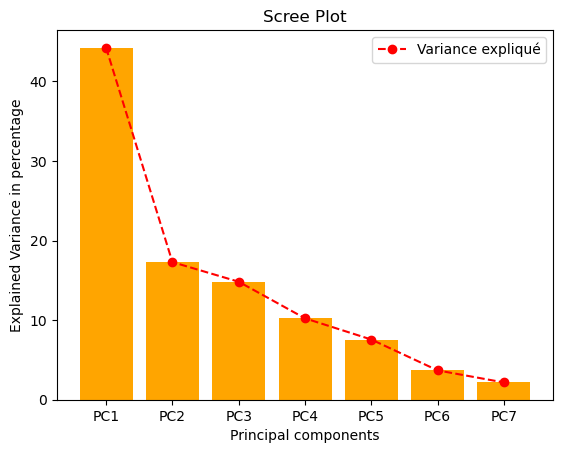

In [ ]:
#Scree plot
#The purpose of this graph is to understand which principal component is usefull in the analysis of the data


labels = ['PC' + str(x) for x in range(1,len(explain_variance_ratio_percentage)+1)]

fig = plt.figure()
plt.bar(x=range(1,len(explain_variance_ratio_percentage)+1),height=explain_variance_ratio_percentage,tick_label = labels,color="orange")
plt.plot(range(1,len(explain_variance_ratio_percentage)+1),explain_variance_ratio_percentage,'ro--',label = "Variance expliqué")
plt.xlabel("Principal components")
plt.ylabel("Explained Variance in percentage")
plt.title("Scree Plot")
plt.legend()
plt.show()




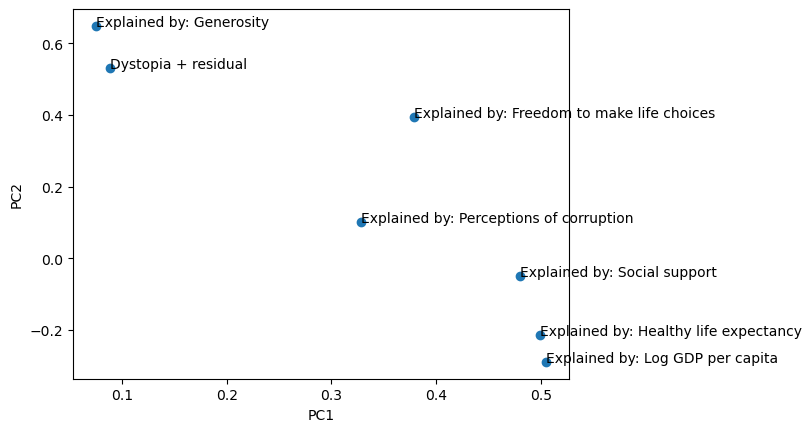

In [ ]:

fig = plt.figure()
plt.scatter(loadings[0,:],loadings[1,:])
for i,feature in enumerate(features):
    plt.annotate(feature,(loadings[0,i],loadings[1,i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('')
plt.show()




In [23]:
import pandas as pd
import numpy as np

# Création d'un DataFrame
data = {
    "Pays": ["France", "Allemagne", "Espagne"],
    "Bonheur": [7.5, 7.1, 6.9],
    "PIB par habitant": [45_000, 50_000, 40_000],
}
df = pd.DataFrame(data)

# Application d'un style
styled_df = df.style.format({
    "Bonheur": "{:.2f}",
    "PIB par habitant": lambda x: f"{x:,} €"
}).highlight_max(subset=["Bonheur"], color="lightgreen") \
  .highlight_min(subset=["Bonheur"], color="lightcoral")

# Affichage dans un notebook (cela ne fonctionne pas dans un terminal Python classique)
styled_df


,Pays,Bonheur,PIB par habitant
0,France,7.50,"45,000 €"
1,Allemagne,7.10,"50,000 €"
2,Espagne,6.90,"40,000 €"
